In [1]:
import pandas as pd
from config import *
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
from PIL import Image
import requests
from io import BytesIO
from termcolor import colored, cprint
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret_id))

In [21]:
data = pd.read_csv('../Data/cleaned/all_season_results.csv')
data.head()

,id,name,original_season_id,real_name,dob,gender,hometown,location,type,miss_con,final_place,safe,win,high,btm,birth_year,age
0,Q100,Akashia,F10S01,Eric Flint,"February 19, 1985",NaN,NaN,"Cleveland, OH, USA",Pageant,0.0,7,0,0,0,2,1985.0,38.0
1,Q101,BeBe Zahara Benet,F10S01,Nea Marshall Kudi Ngwa,"March 20, 1981",Male,"Yaoundé, Cameroon","Minneapolis, MN, USA",Pageant,0.0,1,2,3,1,1,1981.0,42.0
2,Q102,Jade,F10S01,David Sotomayor,"November 18, 1984",NaN,"Chicago, IL, USA",NaN,Comedy,0.0,6,2,0,0,0,1984.0,39.0
3,Q103,Nina Flowers,F10S01,Jorge Luis Flores Sánchez,"February 22, 1974",Male,"Denver, CO, USA","Dallas, TX, USA",Club,1.0,2,1,1,4,0,1974.0,49.0
4,Q104,Ongina,F10S01,Ryan Ong Palao,"January 6, 1982",NaN,"Seattle, WA, USA","Los Angeles, CA, USA",Look,0.0,5,0,2,2,0,1982.0,41.0


In [3]:
queens = pd.read_csv('../Data/raw/ref_queen_img.csv')
queens.head()

,id,name,original_season_id,link_image
0,Q469,Aubrey Haive,F17S02,https://static.wikia.nocookie.net/logosrupauls...
1,Q148,Coco Montrese,F10S05,https://static.wikia.nocookie.net/logosrupauls...
2,Q172,Trinity K. Bonet,F10S06,https://static.wikia.nocookie.net/logosrupauls...
3,Q435,Diamante Merybrown,F18S02,https://static.wikia.nocookie.net/logosrupauls...
4,Q137,Kenya Michaels,F10S04,https://static.wikia.nocookie.net/logosrupauls...


In [24]:
def find_your_drag_mother():
    while True: 
        location = input("Please choose a country you would like to visit:\n A.USA            B.Chile\n C.Thailand       D.UK\n E.Canada         F.Holland\n G.New Zealand    H.Spain\n I.France         J.Italy\n")
        if location not in ['A','B','C','D','E','F','G','H','I','J']: 
            print("")
            print("Please type the letter A,B,C or etc. to make the choice.")
            print("")
            continue
        else:
            break

    if location == 'A':
        fran = 'F10'
    elif location == 'B':
        fran = 'F18'
    elif location == 'C':
        fran = 'F13'
    elif location == 'D':
        fran = 'F14'
    elif location == 'E':
        fran = 'F15'
    elif location == 'F':
        fran = 'F16'
    elif location == 'G':
        fran = 'F17'
    elif location == 'H':
        fran = 'F18'
    elif location == 'I':
        fran = 'F21'
    else: 
        fran = 'F19'
    
    while True: 
        drag_type = input("Please select the word the resonates with you the most:\n A.Pageant B. Club C. Look D. Spooky E.Comedy ")
        if drag_type not in ['A','B','C','D','E']: 
            print("")
            print("Please type the letter A,B,C or etc. to make the choice.")
            print("")
            continue
        else:
            break
    if drag_type == 'A':
        drag = 'Pageant'
    elif drag_type == 'B':
        drag = 'Club'
    elif drag_type == 'C':
        drag = 'Look'
    elif drag_type == 'D':
        drag = 'Spooky'
    else: 
        drag = 'Comedy'
    
    while True: 
        con_type = input("True or False: Instead of becoming the queen of the drag herstory, I'd rather become the queen of the people.")
        if con_type not in ['True','False']: 
            print("")
            print("Please type True or False to continue.")
            print("")
            continue
        else:
            break
    queens = pd.read_csv('../Data/raw/ref_queen_img.csv')
    data = pd.read_csv('../Data/cleaned/all_season_results.csv')
    if con_type == "True":
        lst = data[(data['type']==drag) &  (data['miss_con']==1)].sample(1)
    else:
        lst = data[(data['original_season_id'].str.contains(fran)) & (data['type']==drag) & (data['miss_con']==0) & (data['final_place']<4)].sample(1)
    name = list(lst['name'])[0]
    response = requests.get(list(queens['link_image'][queens['name']==name])[0])
    img = Image.open(BytesIO(response.content))
    
    cprint('**************************************','green',attrs=['bold'])
    print(colored("Your drag mother is: "+name+"! She is a "+drag+" queen.",'black',attrs=['bold']))
    cprint('**************************************','green',attrs=['bold'])
    return img

Please choose a country you would like to visit:
 A.USA            B.Chile
 C.Thailand       D.UK
 E.Canada         F.Holland
 G.New Zealand    H.Spain
 I.France         J.Italy
A
Please select the word the resonates with you the most:
 A.Pageant B. Club C. Look D. Spooky E.Comedy E
True or False: Instead of becoming the queen of the drag herstory, I'd rather become the queen of the people.False
**************************************
Your drag mother is: Lady Camden! She is a Comedy queen.
**************************************


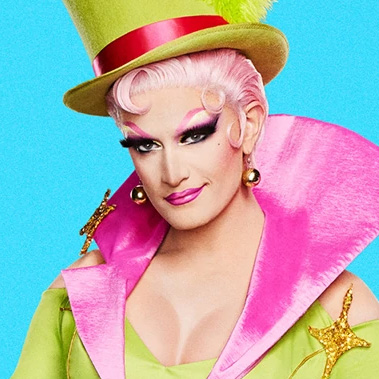

In [25]:
find_your_drag_mother()

In [29]:
data['real_first'] = data['real_name'].apply(lambda x: str(x).split(" ")[0])
data['real_last'] = data['real_name'].apply(lambda x: str(x).split(" ")[-1])

data.head()

,id,name,original_season_id,real_name,dob,gender,hometown,location,type,miss_con,final_place,safe,win,high,btm,birth_year,age,real_first,real_last
0,Q100,Akashia,F10S01,Eric Flint,"February 19, 1985",NaN,NaN,"Cleveland, OH, USA",Pageant,0.0,7,0,0,0,2,1985.0,38.0,Eric,Flint
1,Q101,BeBe Zahara Benet,F10S01,Nea Marshall Kudi Ngwa,"March 20, 1981",Male,"Yaoundé, Cameroon","Minneapolis, MN, USA",Pageant,0.0,1,2,3,1,1,1981.0,42.0,Nea,Ngwa
2,Q102,Jade,F10S01,David Sotomayor,"November 18, 1984",NaN,"Chicago, IL, USA",NaN,Comedy,0.0,6,2,0,0,0,1984.0,39.0,David,Sotomayor
3,Q103,Nina Flowers,F10S01,Jorge Luis Flores Sánchez,"February 22, 1974",Male,"Denver, CO, USA","Dallas, TX, USA",Club,1.0,2,1,1,4,0,1974.0,49.0,Jorge,Sánchez
4,Q104,Ongina,F10S01,Ryan Ong Palao,"January 6, 1982",NaN,"Seattle, WA, USA","Los Angeles, CA, USA",Look,0.0,5,0,2,2,0,1982.0,41.0,Ryan,Palao


In [27]:
drag_name = pd.read_csv('../Data/cleaned/drag_name.csv')
drag_name.head()

,first_letter,first_name,surname
0,A,Peaches,Rivers
1,B,Backroll,Lake
2,C,Orgazma,Surprise
3,D,Sequence,Eleganza
4,E,Felicia,Goodnight


In [31]:
list(drag_name['first_name'][drag_name['first_letter']=='P'])[0]

'Ida'

In [37]:
def drag_name():
    data = pd.read_csv('../Data/cleaned/all_season_results.csv')
    drag_name = pd.read_csv('../Data/cleaned/drag_name.csv')
    while True:
        try:
            mother = input("Please type the name of your drag mother: \n")
        except ValueError:
            print("Sorry I don't understand.")
            continue 
        if mother not in list (data['name']):
            print("Please check the name and enter again.")
        else:
            break
    
    first_input = input("Please enter your first name: \n")
    first_name = list(drag_name['first_name'][drag_name['first_letter']==list(first_input)[0]])[0]
    
    while True:
        try:
            choice = input("Would you like to take your drag mother's name as part of your new name? \n A.Yes     B.No\n")
        except ValueError:
            print("Sorry I don't understand.")
            continue 
        if choice not in ['A','B']:
            print("Please enter only A or B to continue.")
        else:
            break
    if choice == "A":
        last_name = mother.split(" ")[-1]
        name = first_name+" "+last_name
    else: 
        last_input = input("Please enter your last name: \n")
        last_name = list(drag_name['surname'][drag_name['first_letter']==list(last_input)[0]])[0]
        name = first_name+" "+last_name
    
    return print(colored(name,'black',attrs=['bold']))

In [38]:
drag_name()

Please type the name of your drag mother: 
Nina Flowers
Please enter your first name: 
Yinhao
Would you like to take your drag mother's name as part of your new name? 
 A.Yes     B.No
A
Amanda Flowers


In [6]:
songs = pd.read_csv('../Data/cleaned/song_cluster.csv')
songs.head()

,song,artist,album_release_date,release_year,release_decade,id,danceability,energy,key,loudness,...,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,hot,cluster
0,Last Night,Morgan Wallen,2023-01-01,2023,20,2kRkndFdIh2PDDjB53N1CB,0.517,0.675,6,-5.382,...,0.518,203.853,audio_features,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4,Yes,3
1,Kill Bill,SZA,2023-01-01,2023,20,1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,8,-5.747,...,0.418,88.980,audio_features,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4,Yes,9
2,Flowers,Miley Cyrus,2023-01-01,2023,20,7o8y3eDRgyBHFSjgu5PLXZ,0.672,0.159,9,-8.760,...,0.117,113.218,audio_features,spotify:track:3MnewZrZDqej6thgEx3OB1,https://api.spotify.com/v1/tracks/3MnewZrZDqej...,https://api.spotify.com/v1/audio-analysis/3Mne...,210827,4,Yes,6
3,Ella Baila Sola,Eslabon Armado X Peso Pluma,2023-01-01,2023,20,3dnP0JxCgygwQH9Gm7q7nb,0.668,0.758,5,-5.176,...,0.834,147.989,audio_features,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3,Yes,3
4,Calm Down,Rema & Selena Gomez,2023-01-01,2023,20,0WtM2NBVQNNJLh6scP13H8,0.801,0.806,11,-5.206,...,0.802,106.999,audio_features,spotify:track:0WtM2NBVQNNJLh6scP13H8,https://api.spotify.com/v1/tracks/0WtM2NBVQNNJ...,https://api.spotify.com/v1/audio-analysis/0WtM...,239318,4,Yes,5


In [7]:
songs['release_decade'] = songs['release_decade'].apply(lambda x: '00' if x == 0 else x)
songs['release_decade'].value_counts()

release_decade
20    122
10     96
00     75
80     61
90     48
70     22
60      6
50      2
40      1
Name: count, dtype: int64

In [8]:
songs.to_csv('../Data/cleaned/song_cluster.csv',index=False)

In [9]:
def make_clickable(val):
    """
    Function to convert a URL string to a clickable HTML link.
    """
    return f'<a href="{val}" target="_blank">{val}</a>'

In [10]:
songs = pd.read_csv('../Data/cleaned/song_cluster.csv')

In [11]:
songs.head()

,song,artist,album_release_date,release_year,release_decade,id,danceability,energy,key,loudness,...,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,hot,cluster
0,Last Night,Morgan Wallen,2023-01-01,2023,20,2kRkndFdIh2PDDjB53N1CB,0.517,0.675,6,-5.382,...,0.518,203.853,audio_features,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4,Yes,3
1,Kill Bill,SZA,2023-01-01,2023,20,1Qrg8KqiBpW07V7PNxwwwL,0.644,0.735,8,-5.747,...,0.418,88.980,audio_features,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4,Yes,9
2,Flowers,Miley Cyrus,2023-01-01,2023,20,7o8y3eDRgyBHFSjgu5PLXZ,0.672,0.159,9,-8.760,...,0.117,113.218,audio_features,spotify:track:3MnewZrZDqej6thgEx3OB1,https://api.spotify.com/v1/tracks/3MnewZrZDqej...,https://api.spotify.com/v1/audio-analysis/3Mne...,210827,4,Yes,6
3,Ella Baila Sola,Eslabon Armado X Peso Pluma,2023-01-01,2023,20,3dnP0JxCgygwQH9Gm7q7nb,0.668,0.758,5,-5.176,...,0.834,147.989,audio_features,spotify:track:3dnP0JxCgygwQH9Gm7q7nb,https://api.spotify.com/v1/tracks/3dnP0JxCgygw...,https://api.spotify.com/v1/audio-analysis/3dnP...,165671,3,Yes,3
4,Calm Down,Rema & Selena Gomez,2023-01-01,2023,20,0WtM2NBVQNNJLh6scP13H8,0.801,0.806,11,-5.206,...,0.802,106.999,audio_features,spotify:track:0WtM2NBVQNNJLh6scP13H8,https://api.spotify.com/v1/tracks/0WtM2NBVQNNJ...,https://api.spotify.com/v1/audio-analysis/0WtM...,239318,4,Yes,5


In [12]:
def lip_sync_recommender():
    while True: 
        try: 
            dance = str(input("I consider myself a dancing queen.\n A. Strongly agree B.Agree C.Neutral D.Disagree E.Strongly Disagree\n"))
        except ValueError:
            print("Sorry, I didn't understand that.")
            continue
        if dance not in ['A','B','C','D','E']:
            print("")
            print("Please type the letter A,B,C or etc. to make the choice.")
            print("")
            continue
        else:
            break
    if dance == 'A':
        dance_score = random.uniform(0.8,1)
    elif dance == 'B':
        dance_score = random.uniform(0.6,0.8)
    elif dance == 'C':
        dance_score = random.uniform(0.4,0.6)
    elif dance == 'D':
        dance_score = random.uniform(0.2,0.4)
    else: 
        dance_score = random.uniform(0,0.2)
        
    while True: 
        try: 
            energy = str(input("I consider myself an energetic person.\n A. Strongly agree B.Agree C.Neutral D.Disagree E.Strongly Disagree\n"))
        except ValueError:
            print("Sorry, I didn't understand that.")
            continue
        if energy not in ['A','B','C','D','E']:
            print("")
            print("Please type the letter A,B,C or etc. to make the choice.")
            print("")
            continue
        else:
            break
    if energy == 'A':
        energy_score = random.uniform(0.8,1)
    elif energy == 'B':
        energy_score = random.uniform(0.6,0.8)
    elif energy == 'C':
        energy_score = random.uniform(0.4,0.6)
    elif energy == 'D':
        energy_score = random.uniform(0.2,0.4)
    else: 
        energy_score = random.uniform(0,0.2)
    
    while True: 
        try: 
            loud = str(input("I like loud music.\n A. Strongly agree B.Agree C.Neutral D.Disagree E.Strongly Disagree\n"))
        except ValueError:
            print("Sorry, I didn't understand that.")
            continue
        if loud not in ['A','B','C','D','E']:
            print("")
            print("Please type the letter A,B,C or etc. to make the choice.")
            print("")
            continue
        else:
            break
    if loud == 'A':
        loud_score = random.uniform(-4,0)
    elif loud == 'B':
        loud_score = random.uniform(-8,-4)
    elif loud == 'C':
        loud_score = random.uniform(-12,-8)
    elif loud == 'D':
        loud_score = random.uniform(-16,-12)
    else: 
        loud_score = random.uniform(-20,-16)
    
    while True: 
        try: 
            speech = str(input("I like songs that include dialogue.\n A. Strongly agree B.Agree C.Neutral D.Disagree E.Strongly Disagree\n"))
        except ValueError:
            print("Sorry, I didn't understand that.")
            continue
        if speech not in ['A','B','C','D','E']:
            print("")
            print("Please type the letter A,B,C or etc. to make the choice.")
            print("")
            continue
        else:
            break
    if speech == 'A':
        speech_score = random.uniform(0.4,0.6)
    elif speech == 'B':
        speech_score = random.uniform(0.3,0.4)
    elif speech == 'C':
        speech_score = random.uniform(0.2,0.3)
    elif speech == 'D':
        speech_score = random.uniform(0.1,0.2)
    else: 
        speech_score = random.uniform(0,0.1)
        
    
    while True: 
        try: 
            ac = str(input("I usually prefer the acoustic versions.\n A. Strongly agree B.Agree C.Neutral D.Disagree E.Strongly Disagree\n"))
        except ValueError:
            print("Sorry, I didn't understand that.")
            continue
        if ac not in ['A','B','C','D','E']:
            print("")
            print("Please type the letter A,B,C or etc. to make the choice.")
            print("")
            continue
        else:
            break
    if ac == 'A':
        ac_score = random.uniform(0.8,1)
    elif ac == 'B':
        ac_score = random.uniform(0.6,0.8)
    elif ac == 'C':
        ac_score = random.uniform(0.4,0.6)
    elif ac == 'D':
        ac_score = random.uniform(0.2,0.4)
    else: 
        ac_score = random.uniform(0,0.2)
    
    ins_score = 0
    
    while True: 
        try: 
            live = str(input("I usually prefer the live versions.\n A. Strongly agree B.Agree C.Neutral D.Disagree E.Strongly Disagree\n"))
        except ValueError:
            print("Sorry, I didn't understand that.")
            continue
        if live not in ['A','B','C','D','E']:
            print("")
            print("Please type the letter A,B,C or etc. to make the choice.")
            print("")
            continue
        else:
            break
    if live == 'A':
        live_score = random.uniform(0.8,1)
    elif live == 'B':
        live_score = random.uniform(0.6,0.8)
    elif live == 'C':
        live_score = random.uniform(0.4,0.6)
    elif live == 'D':
        live_score = random.uniform(0.2,0.4)
    else: 
        live_score = random.uniform(0,0.2)
    
    while True: 
        try: 
            val = str(input("I usually prefer cheerful & euphoric songs than sad & angry songs.\n A. Strongly agree B.Agree C.Neutral D.Disagree E.Strongly Disagree\n"))
        except ValueError:
            print("Sorry, I didn't understand that.")
            continue
        if val not in ['A','B','C','D','E']:
            print("")
            print("Please type the letter A,B,C or etc. to make the choice.")
            print("")
            continue
        else:
            break
    if val == 'A':
        val_score = random.uniform(0.8,1)
    elif val == 'B':
        val_score = random.uniform(0.6,0.8)
    elif live == 'C':
        val_score = random.uniform(0.4,0.6)
    elif val == 'D':
        val_score = random.uniform(0.2,0.4)
    else: 
        val_score = random.uniform(0,0.2)
    
    while True: 
        try: 
            tempo = str(input("I usually prefer songs with faster tempos.\n A. Strongly agree B.Agree C.Neutral D.Disagree E.Strongly Disagree\n"))
        except ValueError:
            print("Sorry, I didn't understand that.")
            continue
        if tempo not in ['A','B','C','D','E']:
            print("")
            print("Please type the letter A,B,C or etc. to make the choice.")
            print("")
            continue
        else:
            break
    if tempo == 'A':
        tempo_score = random.uniform(180,203)
    elif tempo == 'B':
        tempo_score = random.uniform(150,180)
    elif live == 'C':
        tempo_score = random.uniform(120,150)
    elif tempo == 'D':
        tempo_score = random.uniform(90,120)
    else: 
        tempo_score = random.uniform(60,90)
    
    songs = pd.read_csv('../Data/cleaned/song_cluster.csv')
    song_num = songs.select_dtypes(np.number)
    song_num = song_num.drop(columns=['release_year','key','mode','duration_ms','time_signature','release_decade'])
    score_list = [dance_score,energy_score,loud_score,speech_score,ac_score,ins_score,live_score,val_score,tempo_score]
    arr = np.array(score_list)
    lst = pd.DataFrame(arr).T
    lst.columns = song_num.columns[0:-1]
    
    X = pd.concat([song_num,lst],axis=0)
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
    
    imputer = KNNImputer(n_neighbors=5)
    df_imputed = imputer.fit_transform(X_scaled)
    X_imputed = pd.DataFrame(df_imputed,columns=X_scaled_df.columns)
    cluster = int(X_imputed.iloc[-1,1])
    def make_clickable(val):
        """
        Function to convert a URL string to a clickable HTML link.
        """
        return f'<a href="{val}" target="_blank">{val}</a>'
    song_choice = songs[['song','artist','release_year','id']][(songs['cluster']==cluster) & (songs['hot']=='No')].sample(1)
    song_choice['id'] = song_choice['id'].apply(lambda x: "https://open.spotify.com/track/" + x)
    song_choice = song_choice.style.format({'id':make_clickable})
    
    cprint('**************************************','green',attrs=['bold'])
    print(colored("Now its' time for you to lip sync FOR YOUR LIFE! Good luck & Don't f**k it up!",'black',attrs=['bold']))
    cprint('**************************************','green',attrs=['bold'])
    return song_choice

In [13]:
lip_sync_recommender()

I consider myself a dancing queen.
 A. Strongly agree B.Agree C.Neutral D.Disagree E.Strongly Disagree
A
I consider myself an energetic person.
 A. Strongly agree B.Agree C.Neutral D.Disagree E.Strongly Disagree
A
I like loud music.
 A. Strongly agree B.Agree C.Neutral D.Disagree E.Strongly Disagree
A
I like songs that include dialogue.
 A. Strongly agree B.Agree C.Neutral D.Disagree E.Strongly Disagree
A
I usually prefer the acoustic versions.
 A. Strongly agree B.Agree C.Neutral D.Disagree E.Strongly Disagree
A
I usually prefer the live versions.
 A. Strongly agree B.Agree C.Neutral D.Disagree E.Strongly Disagree
A
I usually prefer cheerful & euphoric songs than sad & angry songs.
 A. Strongly agree B.Agree C.Neutral D.Disagree E.Strongly Disagree
A
I usually prefer songs with faster tempos.
 A. Strongly agree B.Agree C.Neutral D.Disagree E.Strongly Disagree
A
**************************************
Now its' time for you to lip sync FOR YOUR LIFE! Good luck & Don't f**k it up!
*******

,song,artist,release_year,id
365,Fuego,Eleni Foureira,2018,https://open.spotify.com/track/4TwWOcvjY1qt3QJvtveAGm
